In [1]:
#coding: utf-8 
import csv
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
 
#read the data in csv file and create dataframe   
df_file = pd.read_csv("Final.csv",encoding = "ISO-8859-1")
df = df_file.ix[:,1:]
#drop all the Null values in dataframe
df = df.dropna()

#save the cleaned data in a new csv file
df2 = df.ix[:,1:5] 
df2.to_csv("hotel_clean.csv")

Intercept :  -541.98212209
Slope :  [   0.          154.64517596   47.34375676]
R-squared: 0.509003


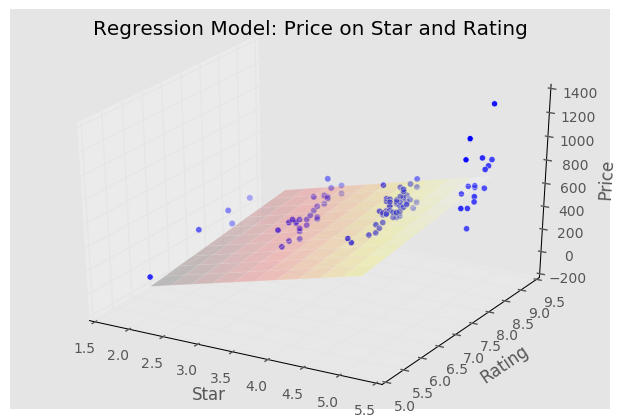

In [2]:
def plot3D(myDF):
    import numpy
    from sklearn import linear_model
    x1 = myDF["star"]
    x1 = x1.tolist()
    x2 = myDF['rating']
    x2 = x2.tolist()
    y = myDF["price"]
    y = y.tolist()
   
    c = numpy.ones(len(myDF))
    X = numpy.concatenate(([c],[x1],[x2]), axis=0).T

    model = linear_model.LinearRegression(fit_intercept = True)
    fit = model.fit(X,y)
    b = fit.coef_
    B = fit.intercept_
    
    print("Intercept : ",fit.intercept_)
    print("Slope : ", fit.coef_)

    from sklearn.metrics import r2_score
    pred = model.predict(X)
    r2 = r2_score(y,pred) 
    print ('R-squared: {:.6f}'.format(r2))
    
    ###############
    myData = X
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    
    from mpl_toolkits.mplot3d import axes3d, Axes3D 
    fig = plt.figure()
    ax = Axes3D(fig)    
    
    plt.hold(True)
    
    x_max = max(myData[:,1])
    x_min = min(myData[:,1])
    y_max = max(myData[:,2]) 
    y_min = min(myData[:,2])

    b1 = float(b[1])
    b2 = float(b[2])   

    x_surf=np.linspace(x_min, x_max, 100)   
    y_surf=np.linspace(y_min, y_max, 100)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    z_surf = B + b1*x_surf +b2*y_surf
    
    ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot, alpha=0.2);  
    ax.scatter(x1, x2, y);    
    
    ax.set_xlabel('Star')
    ax.set_ylabel('Rating')
    ax.set_zlabel('Price')
    plt.title("Regression Model: Price on Star and Rating")
    plt.show()

plot3D(df)   

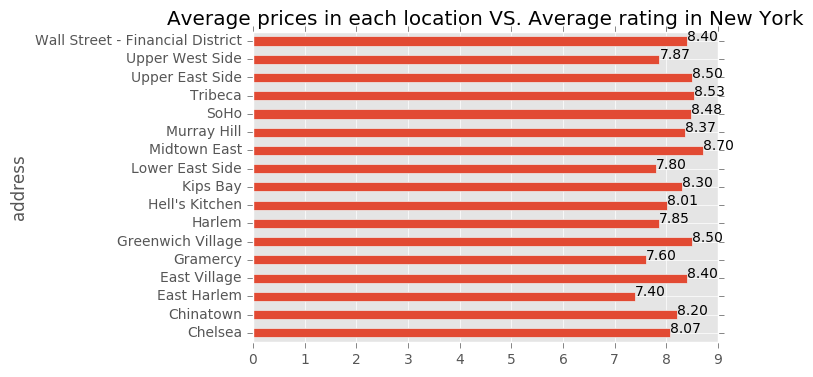

In [3]:
# draw a bar plot to show the average price of different regions
dfSub_rating = df[(df['address'] != 'New York')]
dfSub_rating = dfSub_rating["rating"].groupby(dfSub_rating["address"]).mean()
dfSub_rating.plot(kind = 'barh')
plt.title("Average prices in each location VS. Average rating in New York")

a = [i for i in range(len(dfSub_rating))] 
b = [i for i in dfSub_rating]
for i in range(len(dfSub_rating)):
    plt.text(b[i],a[i],"{:.2f}".format(b[i]))
    #plt.text(p[i]+80,m[i],countList[i])

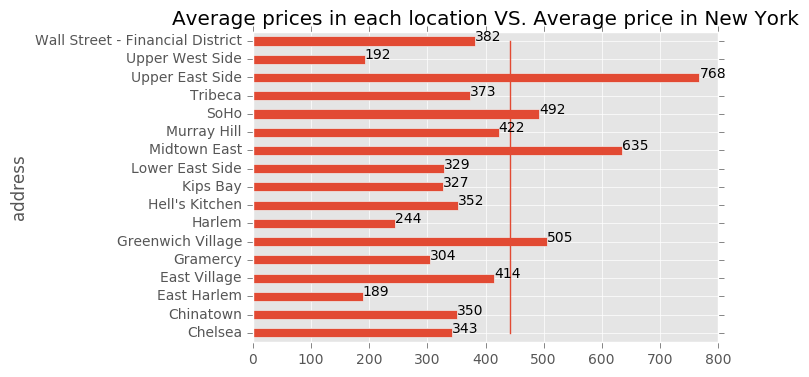

In [4]:
# draw a bar plot to show the average price of different regions
df3 = df[ (df['address'] != 'New York') & (df['address'] != 'New York, NY')]
dfSub = df3["price"].groupby(df["address"]).mean()
dfSub.plot(kind = 'barh')

x = [i for i in range(len(dfSub))]
y = df["price"].mean()
Y = [y]*len(dfSub)
import matplotlib.pyplot as plt
plt.plot(Y,x)

countDF = pd.DataFrame(df3.groupby('address').size().rename('counts'))
countList = [str(i) for i in countDF["counts"]]

m = [i for i in range(len(dfSub))] 
p = [i for i in dfSub]
for i in range(len(dfSub)):
    plt.text(p[i],m[i],"{:.0f}".format(p[i]))
    #plt.text(p[i]+80,m[i],countList[i])
plt.title("Average prices in each location VS. Average price in New York")    

([<matplotlib.axis.YTick at 0x1185c5320>,
 <a list of 17 Text yticklabel objects>)

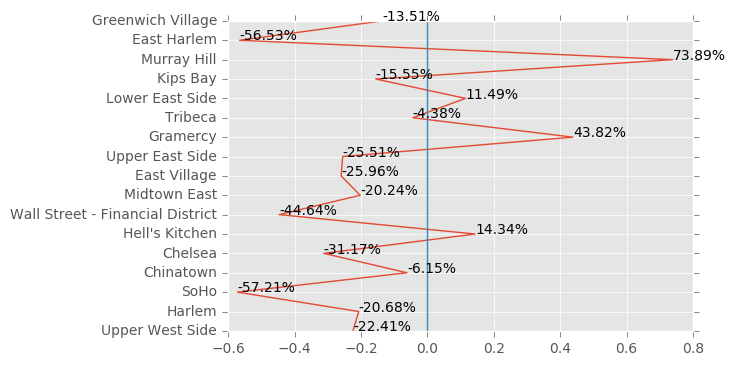

In [5]:
percent = [ (float(p[i])-y)/y for i in range(len(dfSub))]
adressList = []

for i in df['address']: 
    if i not in adressList and i != "New York, NY" and i != "New York":
        adressList.append(i)

percentDF = pd.DataFrame({"percentage":percent,"address":adressList},index = adressList)

plt.plot(percent,[i for i in range(len(adressList))])
pt = ["{:.2f}%".format(i*100) for i in percent]

for i in range(len(dfSub)):
    plt.text(percent[i],m[i],pt[i])
    
x = [i for i in range(len(dfSub))]
k = [0]*len(dfSub)
import matplotlib.pyplot as plt
plt.plot(k,x)    
plt.yticks(x, adressList)   

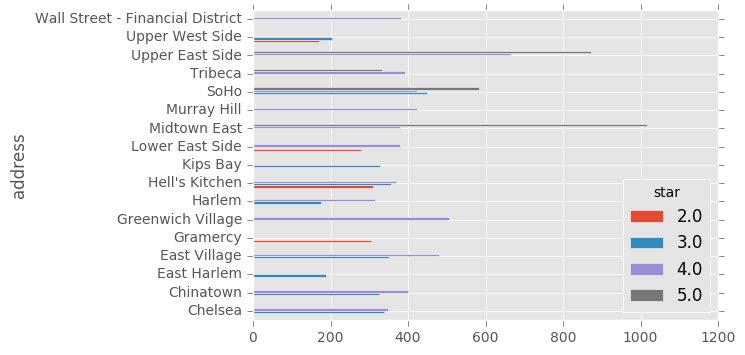

In [6]:
#show the average price of hotels with different stars in each region
import numpy
df4 = df3.pivot_table('price',index='address',columns='star',aggfunc=numpy.mean)
df4.plot(kind = 'barh')